# ATMS 391: Week 7a
## Histograms, PDFs, and CDFs

In this exercise, we will practicing plotting the histograms, Probability Distribution Functions, and Cumulative Distribution Functions of a dataset.  We'll use the precipitation dataset we used previously.

In [42]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import xray

precip = xray.open_dataset('precip.mon.total.nc')
precip

<xray.Dataset>
Dimensions:    (lat: 36, lon: 72, nbnds: 2, time: 1385)
Coordinates:
  * lat        (lat) float32 87.5 82.5 77.5 72.5 67.5 62.5 57.5 52.5 47.5 ...
  * lon        (lon) float32 2.5 7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 ...
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 1900-03-01 ...
  * nbnds      (nbnds) int64 0 1
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 9.969e+36 9.969e+36 ...
    precip     (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    platform: Surface Land
    title: GHCN version 2 Land Precipitation Mean
    history: Originally created at NOAA/ESRL PSD by CAS 10/2011 from files obtained at NCDC
    Conventions: CF-1.0
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ghcnv2.html
    Source: Obtained from http://www.ncdc.noaa.gov/temp-and-precip/ghcn-gridded-products.php via ftp ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/v2/grid/

Let's look at how the distribution of Tropical precipitation rates have changed over time.  Let's group the data by decade, and plot a distribution of the point by point precipitation rates within that region.

First, let's subset the data by space.

In [43]:
precip_space_subset=precip['precip'][:,np.abs(precip['lat']) < 20.,:]
precip_space_subset

<xray.DataArray 'precip' (time: 1385, lat: 8, lon: 72)>
[797760 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 17.5 12.5 7.5 2.5 -2.5 -7.5 -12.5 -17.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 ...
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 1900-03-01 ...
Attributes:
    dataset: GHCN version 2 Gridded Land Precipitation Dataset
    var_desc: Precipitation
    level_desc: Surface
    statistic: Mean
    parent_stat: Observation
    valid_range: [-1000.  2000.]
    actual_range: [ -518.34997559  1693.90002441]
    units: mm
    long_name: GHCN V2 Gridded Precipitation
    precision: 2
    cell_methods: time: average (monthly from values)
    standard_name: precip

In [46]:
precip_time_subset=precip_space_subset.sel(time=slice('1900-01-01', '1909-12-31'))
precip_time_subset
#print(precip_time_subset['time'])

<xray.DataArray 'precip' (time: 120, lat: 8, lon: 72)>
array([[[             nan,              nan,              nan, ...,
                      nan,              nan,   1.99999996e-02],
        [             nan,              nan,              nan, ...,
           1.38999999e+00,              nan,              nan],
        [  2.08799992e+01,              nan,              nan, ...,
                      nan,              nan,   2.81000004e+01],
        ..., 
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan]],

       [[             nan,              nan,              nan, ...,
                      nan,              nan,  -1.00000001e-01],
     

OK, now that we know how to create a subset, let's do the statistical analysis of this field.  First, let's create a histogram of all the values (note we are not doing any spatial or time averaging, just subsetting), and we will set up the bins in the histogram to have 31 values, 30 mm wide between 0 and 900 mm.  These are the bin edges.  The plt.hist function will count the values between the bin edges, and display them as a plot.  Then we will create a PDF by enabling `normed=True`, and a CDF by `normed=True` and `cumulative=True`, respectively.  Note that the returned value has the values, and the bin **edges**.

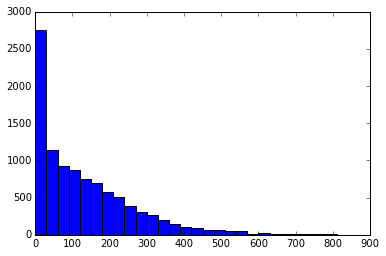

In [56]:
hist_1910=plt.hist(precip_time_subset.values.ravel(), bins=30*np.arange(31));

In [48]:
hist_1910

(array([  2.74400000e+03,   1.13500000e+03,   9.27000000e+02,
          8.69000000e+02,   7.55000000e+02,   6.94000000e+02,
          5.73000000e+02,   5.02000000e+02,   3.90000000e+02,
          3.04000000e+02,   2.61000000e+02,   1.98000000e+02,
          1.43000000e+02,   1.11000000e+02,   9.60000000e+01,
          6.40000000e+01,   5.80000000e+01,   5.30000000e+01,
          5.60000000e+01,   1.70000000e+01,   2.20000000e+01,
          1.40000000e+01,   5.00000000e+00,   1.20000000e+01,
          8.00000000e+00,   1.30000000e+01,   5.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   1.00000000e+00]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
        390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750,
        780, 810, 840, 870, 900]),
 <a list of 30 Patch objects>)

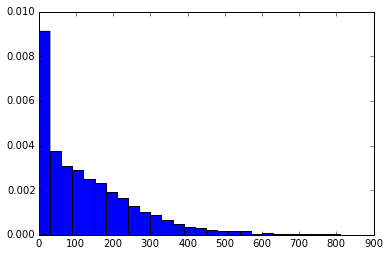

In [49]:
pdf_1910=plt.hist(precip_time_subset.values.ravel(), bins=30*np.arange(31), normed=True);

In [50]:
pdf_1910

(array([  9.11385678e-03,   3.76976219e-03,   3.07891590e-03,
          2.88627607e-03,   2.50763917e-03,   2.30503521e-03,
          1.90314866e-03,   1.66733094e-03,   1.29533679e-03,
          1.00969842e-03,   8.66879235e-04,   6.57632523e-04,
          4.74956822e-04,   3.68672778e-04,   3.18852132e-04,
          2.12568088e-04,   1.92639830e-04,   1.76032948e-04,
          1.85997077e-04,   5.64633984e-05,   7.30702803e-05,
          4.64992693e-05,   1.66068819e-05,   3.98565165e-05,
          2.65710110e-05,   4.31778929e-05,   1.66068819e-05,
          9.96412914e-06,   9.96412914e-06,   3.32137638e-06]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
        390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750,
        780, 810, 840, 870, 900]),
 <a list of 30 Patch objects>)

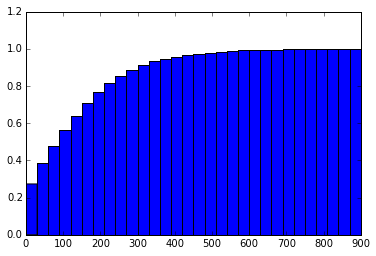

In [51]:
cdf_1910=plt.hist(precip_time_subset.values.ravel(), bins=30*np.arange(31), normed=True, cumulative=True)

In [ ]:
cdf_1910

Note that the distribution is far from "normal" - the left tail of the distribution is "heavier" than the right tail.  This physically corresponds with a higher probability of light rain than heavy rain in the observations which makes sense.  Examine how the PDF and CDF looks in this case corresponding with this distribution.

---

Now, let's process all of the decades.  I'll set up a `for` loop to process through.  We will use `pandas` handy built in date functionality which is nice for selecting date periods automatically. Decades can be selected using 10AS as the frequency string, and we'll select 11 decades starting in 1900.

In [67]:
import pandas as pd

time_start = pd.date_range('1900-01-01', freq='10AS', periods=11)
time_end = pd.date_range('1909-12-31', freq='10A', periods=11)
print(time_start)
print(time_end)

DatetimeIndex(['1900-01-01', '1910-01-01', '1920-01-01', '1930-01-01',
               '1940-01-01', '1950-01-01', '1960-01-01', '1970-01-01',
               '1980-01-01', '1990-01-01', '2000-01-01'],
              dtype='datetime64[ns]', freq='10AS-JAN', tz=None)
DatetimeIndex(['1909-12-31', '1919-12-31', '1929-12-31', '1939-12-31',
               '1949-12-31', '1959-12-31', '1969-12-31', '1979-12-31',
               '1989-12-31', '1999-12-31', '2009-12-31'],
              dtype='datetime64[ns]', freq='10A-DEC', tz=None)


Now, it is just a matter of looping over the decades, storing the data into arrays, and then plotting.  We will set up a numpy array to store the data from the histograms.  Instead of `plt.hist` i'll use `np.histogram`, which is very similar, because I don't want to plot the data yet.

In [72]:
ndecades=len(time_start)

#bins for histograms
bins=30*np.arange(31)
#What is going on here?  Test!
bin_centers=bins[0:-1]+np.diff(bins)/2.
nbins=len(bins)

#need to subtract 1 from nbins because bins are the edges
#and are 1 more value than the histogram
histogram_decades=np.zeros((nbins-1,ndecades))

for i in np.arange(ndecades):
    data_this_decade=precip_space_subset.sel(time=slice(time_start[i], time_end[i]))
    histogram_decades[:,i]=np.histogram(data_this_decade,bins=bins)[0]


In [73]:
histogram_decades

array([[  2.74400000e+03,   3.70100000e+03,   4.57100000e+03,
          5.58800000e+03,   6.18600000e+03,   6.84900000e+03,
          7.29400000e+03,   7.21900000e+03,   7.15600000e+03,
          5.33300000e+03,   3.66600000e+03],
       [  1.13500000e+03,   1.51700000e+03,   1.80900000e+03,
          2.24200000e+03,   2.25300000e+03,   2.81300000e+03,
          2.86400000e+03,   2.86300000e+03,   2.82200000e+03,
          2.20000000e+03,   1.63800000e+03],
       [  9.27000000e+02,   1.30200000e+03,   1.59700000e+03,
          1.80100000e+03,   1.93100000e+03,   2.24000000e+03,
          2.43500000e+03,   2.46300000e+03,   2.43100000e+03,
          1.97300000e+03,   1.48400000e+03],
       [  8.69000000e+02,   1.18100000e+03,   1.45700000e+03,
          1.73100000e+03,   1.67000000e+03,   2.02800000e+03,
          2.20000000e+03,   2.21300000e+03,   2.23600000e+03,
          1.68600000e+03,   1.22100000e+03],
       [  7.55000000e+02,   1.04500000e+03,   1.28000000e+03,
          1.55

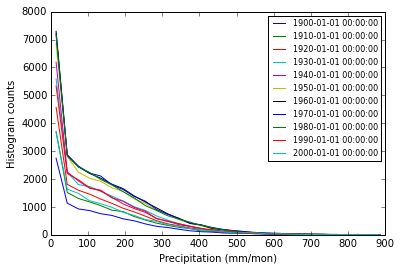

In [74]:
plt.figure()
plt.plot(bin_centers,histogram_decades)
plt.xlabel('Precipitation (mm/mon)')
plt.ylabel('Histogram counts')
plt.legend(time_start,fontsize=8)
plt.show()

Interestingly, it looks like there are more lications with stations in the mid-20th century than now in the Tropics.  This has been associated with a decline in the observational network in Africa.

That takes care of the histogram, but what about the PDF?

The definition of a PDF is the sum of the histogram divided by the total of the histogram, which yields the fraction or probability of obtaining a data in that range out of the population of datapoints.  We can divide the histogram by the sum on axis=0 (which will sum each decadal pdf) to get the PDF.

In [75]:
pdf_decades=histogram_decades/np.sum(histogram_decades,axis=0)

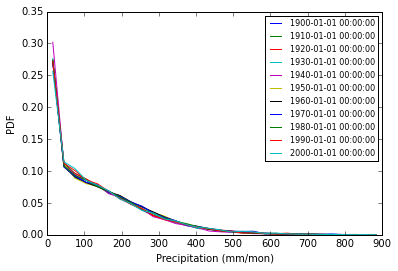

In [76]:
plt.figure()
plt.plot(bin_centers,pdf_decades)
plt.xlabel('Precipitation (mm/mon)')
plt.ylabel('PDF')
plt.legend(time_start,fontsize=8)
plt.show()

To get the CDF, we can use the `cumsum` object, which will sum the PDF over a specified axis, in this case we want axis 0, which are the precipitation rates.

In [ ]:
cdf_decades=pdf_decades.cumsum(axis=0)

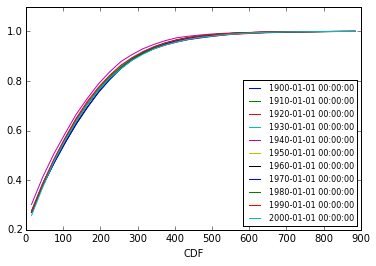

In [77]:
plt.figure()
plt.plot(bin_centers,cdf_decades)
plt.xlabel('Precipitation (mm/mon)')
plt.xlabel('CDF')
plt.legend(time_start,fontsize=8,loc='lower right')
plt.show()

OK, we see that the statistical distribution of observed Tropical rain rates is quite similar over the decades.  We have different numbers of stations, but the distribution of rain rates at those stations hasn't changed much.

For you homework, you need to do the statistics when subsetting over space.  It is quite similar to what we did here.